# 神經網路(邏輯斯迴歸)

## 1-加載 Library

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2-數據集處理

### 2.1-加載(鳶尾花數據集)

In [3]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df = df.drop(["petal width (cm)", "sepal width (cm)"], axis = 1)
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


### 2.2-切割數據集(訓練集)與(測試集)

In [4]:
from sklearn.model_selection import train_test_split
data = df.drop(["target"], axis = 1)
data_train, data_test, target_train, target_test = train_test_split(data,
                                                                    df['target'],
                                                                    test_size=0.1)

## 3-建立模型(邏輯迴歸)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(data_train, target_train)

## 4-模型準確率分析

In [6]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測:", list(predict))
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測: [2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2]
正確標籤: [2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2]
正確率:  100.0 %


## 5-繪圖(感知器)的決策邊界

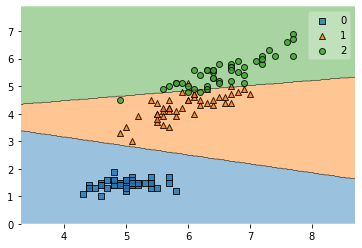

In [9]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(X=np.array(data_train),
                      y=np.array(target_train),
                      clf=clf)

### 結論: Logistic Regresson 雖然解決了第一個問題，但卻沒解決我們的第二個問題，非線性的分類，因此實用性也不算高

## XOR問題的解法:
 * 解法1-多層感知器(MLP) --> 利用多個神經元組合
 * 解法2-支援向量機(SVM) --> 把數據點升高維度，也許就可以變成線性可分問題